# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

In [3]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

In [4]:
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : tuktoyaktuk
Processing Record 2 of Set 1 : adrar
Processing Record 3 of Set 1 : espanola
Processing Record 4 of Set 1 : aksu
Processing Record 5 of Set 1 : port elizabeth
Processing Record 6 of Set 1 : avarua
Processing Record 7 of Set 1 : jamestown
Processing Record 8 of Set 1 : mar del plata
Processing Record 9 of Set 1 : kaeo
Processing Record 10 of Set 1 : rikitea
Processing Record 11 of Set 1 : puerto ayora
Processing Record 12 of Set 1 : ushuaia
Processing Record 13 of Set 1 : juneau
Processing Record 14 of Set 1 : lethem
Processing Record 15 of Set 1 : celestun
Processing Record 16 of Set 1 : port augusta
Processing Record 17 of Set 1 : lavrentiya
Processing Record 18 of Set 1 : zhigansk
Processing Record 19 of Set 1 : busselton
Processing Record 20 of Set 1 : pachino
Processing Record 21 of Set 1 : pio ix
Processing Record 22 of Set 1 : albany
Processing Record 23 of Set 1 : sobolevo
Processi

## Generate Cities List

In [7]:

# Create a panda data frame using data retrieved
weather_dict = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list})


In [8]:
# Count
weather_dict.count()

City          579
Cloudiness    579
Country       579
Date          579
Humidity      579
Lat           579
Lng           579
Max Temp      579
Wind Speed    579
dtype: int64

In [9]:
weather_dict

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Tuktoyaktuk,90,CA,1620236737,86,69.4541,-133.0374,19.40,3.44
1,Adrar,2,MR,1620236738,14,20.5022,-10.0711,89.94,13.20
2,Española,1,US,1620236446,25,35.9911,-106.0806,70.00,6.91
3,Aksu,6,CN,1620236738,15,41.1231,80.2644,69.24,5.08
4,Port Elizabeth,0,ZA,1620236738,94,-33.9180,25.5701,66.20,3.44
...,...,...,...,...,...,...,...,...,...
574,Erenhot,100,CN,1620236877,29,43.6475,111.9767,51.73,34.00
575,Kem',100,RU,1620236877,78,64.9555,34.5793,31.33,5.21
576,Naze,100,JP,1620236878,70,28.3667,129.4833,65.08,8.57
577,Taoudenni,74,ML,1620236878,19,22.6783,-3.9836,94.08,11.99


In [10]:
# Save city data into a csv file
weather_dict.to_csv("output_data/cities.csv", index = False)

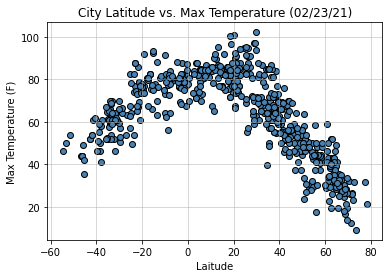

In [12]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature (02/23/21)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)




In [14]:
# # Save the plotted figure as .pngs
plt.savefig("Images/City Latitude vs Max Temperature.png")

<Figure size 432x288 with 0 Axes>

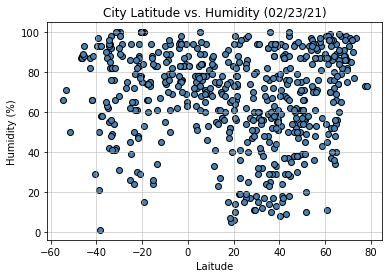

In [15]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity (02/23/21)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/City Latitude vs Humidity.png")

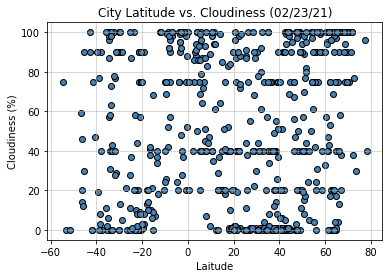

In [16]:

# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness (02/23/21)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/City Latitude vs Cloudiness.png")

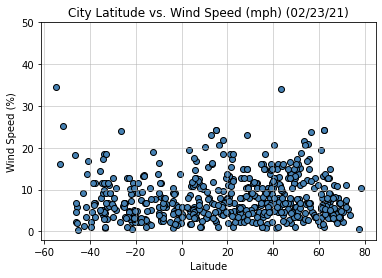

In [17]:
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph) (02/23/21)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/City Latitude vs Wind Speed (mph).png")

In [29]:
# Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [31]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_dict.loc[weather_dict["Lat"] >= 0]
southern_hemisphere = weather_dict.loc[weather_dict["Lat"] < 0]

The r-squared is: 0.7669077042168919


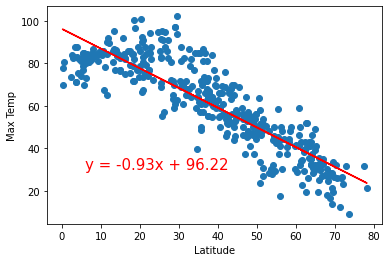

In [33]:
# Linear regression on Northern Hemisphere
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

The r-squared is: 0.6031459669472844


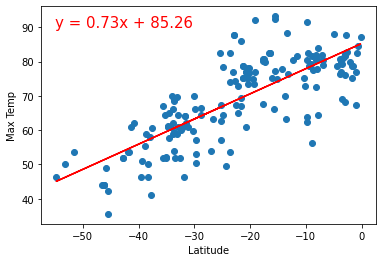

In [34]:
# Linear regression on Southern Hemisphere
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-55, 90))

### Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.018682851000443777


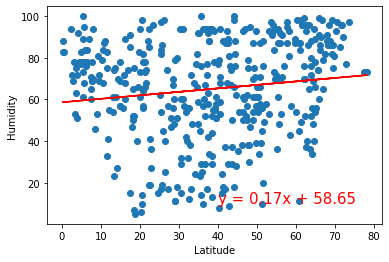

In [35]:
# Northern Hemisphere
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

The r-squared is: 0.006677546203216019


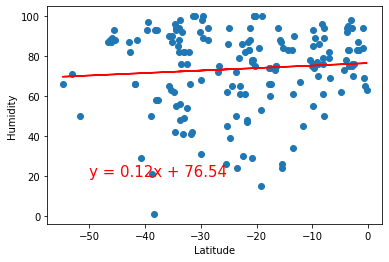

In [36]:
# Southern Hemisphere
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-50, 20))

### Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.011337974201085217


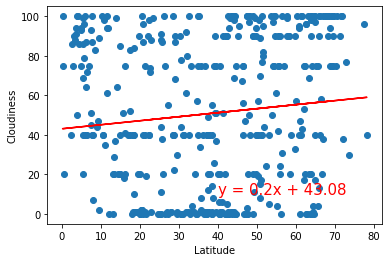

In [37]:
# Northern Hemisphere
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))

The r-squared is: 0.05728241526298657


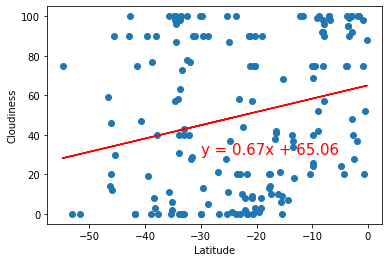

In [38]:
# Southern Hemisphere
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))

### Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.001288875757316094


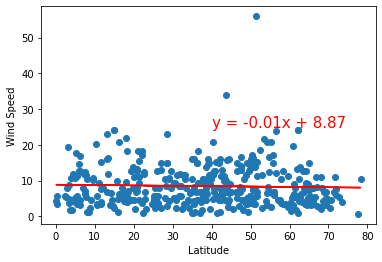

In [39]:
# Northern Hemisphere
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))

The r-squared is: 0.061221371799172836


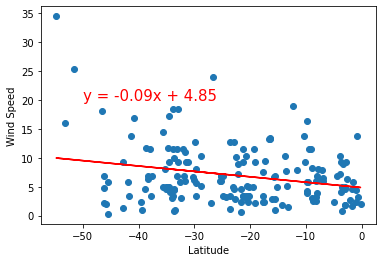

In [40]:
# Southern Hemisphere
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-50, 20))